In [1]:
import cv2
import cv
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as skio
from sklearn.cluster import k_means
from sklearn.decomposition import PCA
from scipy.fftpack import dct
from sklearn import preprocessing
from sklearn.svm import SVC
from featurizer import Featurizer,convert_lab
from colorizer import Colorizer

In [2]:
test_image = skio.imread("images/grass4.jpg")
training_images = ["images/grass1.jpg","images/grass3.jpg"]

In [3]:
def get_grayscale(image):
    gray = cv2.cvtColor(image, cv.CV_RGB2GRAY)
    return cv2.merge((gray,gray,gray))

def select_hyperparams(k,pc,actual_image):
    #getting the right featurizer
    f = Featurizer(training_images,k=k,pca_size=pc,num_samples=10000)
    f.compute_k_means()
    print "Getting features..."
    f.compute_features()
    #getting the right colorizer
    colorizer = Colorizer(f)
    print "Starting Training of SVMs..."
    colorizer.train()
    #running the experiment
    print "Colorizing Image..."
    gray_test = get_grayscale(actual_image)
    colored_image = colorizer.color_image(gray_test)
    print "K: " + str(k)
    print "PCA Size: " + str(pc)    
    print "********************************"
    skio.imshow(colored_image)
    skio.show()

In [4]:
windowSizes = [5,10,20]
gamma = [1.0/32,1.0/64,1.0/16]
c = [.5,1.5]
#k= [10,15,25]
k = [25]
#pc = [32,40,50]
pc = [50]

Cluster Centers...
[[ 138.3144527    84.68287755]
 [  95.7334591   168.1641962 ]
 [ 130.80596571  120.26161926]
 [ 125.69202352   93.50686068]
 [ 106.75517393  163.2457948 ]
 [ 106.87113908  175.34082366]
 [  89.71573639  184.07783003]
 [ 122.8134715   106.54983237]
 [ 131.31355804   82.22800786]
 [ 133.65318671  100.52205274]
 [ 112.18779466  145.98768989]
 [ 123.95038447  127.06352984]
 [  91.99870951  179.42532498]
 [ 128.17936193   87.52274462]
 [ 106.47200604  169.60506233]
 [ 142.4072879    75.15528097]
 [ 135.18914853   91.64527129]
 [ 123.37236069  100.39380641]
 [ 131.99537375  111.66910153]
 [ 108.56104121  179.1021996 ]
 [ 123.01641447  112.68855262]
 [ 135.74221141   77.47767402]
 [  93.58966629  174.46636865]
 [ 108.15407226  155.88646663]
 [ 122.77189638  120.03173713]]
Getting features...
SURF Features...
DFT Features...
Meanvar Features...
SURF Features...
DFT Features...
Meanvar Features...
Starting Training of SVMs...
Feature Shape...(20000, 50)
Label Shape...(20000,)

/home/vashishtm/anaconda/lib/python2.7/site-packages/sklearn/cluster/k_means_.py:775: RuntimeWarning: Got data type uint8, converted to float to avoid overflows
  X = self._check_test_data(X)


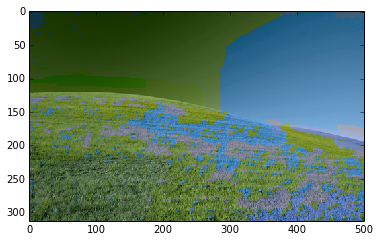

In [5]:
%matplotlib inline  
for k_i in k:
    for p_i in pc:
        select_hyperparams(k_i,p_i,test_image)

In [6]:
def colorize_test_image(test_im,k,p,train_images):
    f = Featurizer(train_images,k=k,pca_size=p,num_samples=10000)
    f.compute_k_means()
    print "Getting features..."
    f.compute_features()
    colorizer = Colorizer(f)
    print "Starting Training of SVMs..."
    colorizer.train()
    #running the experiment
    print "Colorizing Image..."
    gray_test = get_grayscale(test_image)
    colored_image = colorizer.color_image(gray_test)
    return colored_image

Grayscale Image


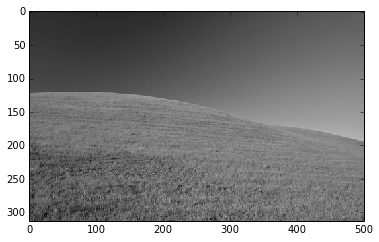

Sample Training Image 0


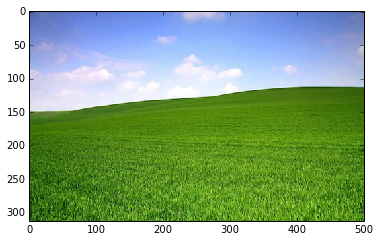

Sample Training Image 1


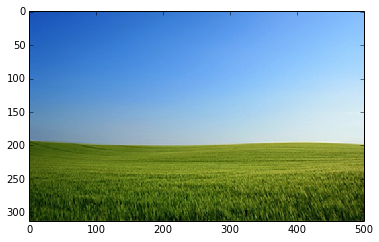

Colorized Image
Cluster Centers...
[[ 135.40710464   77.63421522]
 [  92.91379515  176.54068916]
 [ 122.82419605  118.51782255]
 [ 106.4602441   171.57730916]
 [ 132.73612653  101.96517758]
 [ 112.07974403  146.21388137]
 [  96.42518408  165.9106452 ]
 [ 108.16347476  156.74055655]
 [ 141.1868231    80.25947653]
 [ 127.71864227   89.25251923]
 [ 142.52963101   73.07392223]
 [ 122.86001563  110.53115896]
 [  89.22652742  185.04668407]
 [ 131.9056841   111.69793763]
 [ 130.96075015  120.11006354]
 [ 135.26498674   94.62453581]
 [ 107.95489805  177.91046099]
 [  91.57474085  180.50532948]
 [ 124.06198347  126.18794528]
 [ 137.09333911   86.56357463]
 [  94.46291837  171.99744434]
 [ 106.68245953  164.90643101]
 [ 122.71206102  102.72779279]
 [ 124.95360661   95.52732761]
 [ 130.71696136   83.08133595]]
Getting features...
SURF Features...
DFT Features...
Meanvar Features...
SURF Features...
DFT Features...
Meanvar Features...
Starting Training of SVMs...
Feature Shape...(20000, 40)
Label 

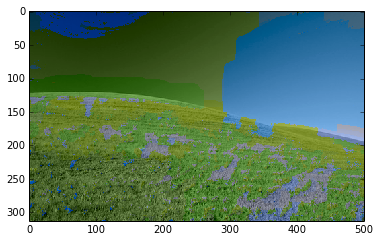

In [13]:
%matplotlib inline  
print "Grayscale Image"
gray_test = get_grayscale(test_image)
skio.imshow(gray_test)
skio.show()
skio.imsave("results/grass4_gray.jpg",gray_test)

print "Sample Training Image 0"
skio.imshow(skio.imread(training_images[0]))
skio.show()

print "Sample Training Image 1"
skio.imshow(skio.imread(training_images[1]))
skio.show()

print "Colorized Image"
best_k = 25
best_pca = 42
colored_image = colorize_test_image(test_image,best_k,best_pca,training_images)

skio.imshow(colored_image)
skio.show()

In [14]:
from skimage.filter import median_filter
def apply_smoothing_filter(image):
    lab = cv2.cvtColor(image, cv.CV_RGB2Lab)
    lab[:,:,1] = cv2.medianBlur(lab[:,:,1],51)
    lab[:,:,2] = cv2.medianBlur(lab[:,:,2],51)
    #lab = cv2.medianBlur(lab,5)
    return cv2.cvtColor(lab,cv.CV_Lab2RGB)

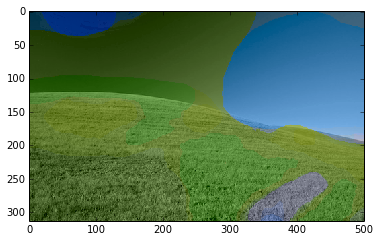

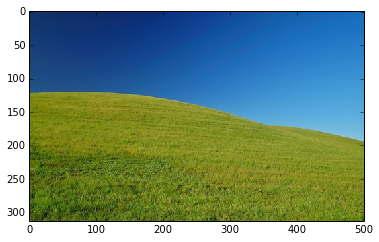

In [15]:
smoothed_image = apply_smoothing_filter(colored_image)
skio.imshow(smoothed_image)
skio.show()
skio.imsave("results/grass4_col.jpg",smoothed_image)
skio.imshow(test_image)
skio.show()

Cluster Centers...
[[ 121.4429001   120.41157367]
 [  94.55608346  162.29199407]
 [ 134.23770685   93.38217199]
 [  90.79615445  181.67072382]
 [  98.8884973   149.13261861]
 [ 125.60452269  105.27961462]
 [ 131.2782974   117.14786362]
 [ 138.85104952   84.2222368 ]
 [  94.39593873  173.74954147]
 [ 115.92868295  132.35731999]]
Image with Regular Colors


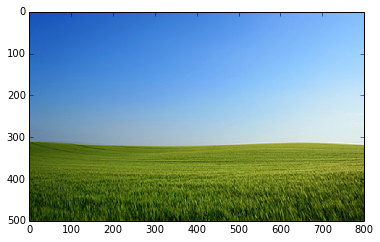

Image with Discretized Colors..


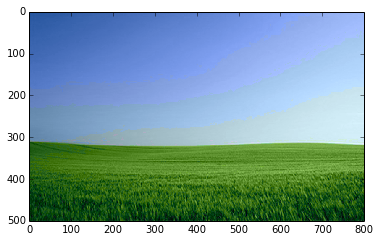

In [12]:
f = Featurizer(training_images,k=10,pca_size=40,num_samples=20000)
f.compute_k_means()
lab = cv2.cvtColor(test_image, cv.CV_RGB2Lab)

samples = np.arange(test_image.shape[0]*test_image.shape[1])
disc,label = f.discretize_colors(lab,samples)
disc = disc.reshape(test_image.shape[0],test_image.shape[1],3).astype('uint8')

out_im = cv2.cvtColor(disc,cv.CV_Lab2RGB)

print "Image with Regular Colors"
skio.imshow(test_image)
skio.show()


print "Image with Discretized Colors.."
skio.imshow(out_im)
skio.show()
skio.imsave("results/disc_grass4.jpg",out_im)


In [ ]:
test_im = skio.imread("images/jolie_port.jpg")
train_ims = ["images/jolie.jpg"]
k_best = 25
pca_best = 40
colored_im = colorize_test_image(test_im,k_best,pca_best,train_ims)
print "Colored Image"
skio.imshow(colored_im)
skio.show()

In [ ]:
smoothed_image = apply_smoothing_filter(colored_image)
skio.imshow(smoothed_image)
skio.show()